In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

## Analyzing Micorosft stocks based off ticker funtion
## We want to examine the full histpry of the stock price

In [2]:
msft_hist.head()

## Analuzing when Microsoft became publicly trading
## We can also tell that this is sequential time series data which means that it is just ordered by time

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062686,0.064308,0.062686,0.063767,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

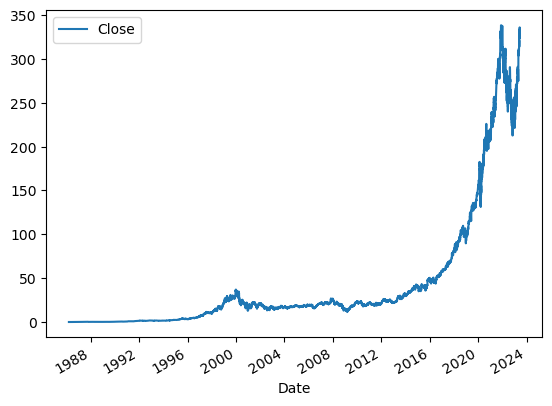

In [3]:
msft_hist.plot.line(y="Close", use_index = True)

In [4]:
data = msft_hist[["Close"]]
data = data.rename(columns = {'Close' : 'Actual Close'})
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

## Defined data choosing close column then renaming the close column to "Actual Close" 

## Then defining "Target" by using the rolling fucntion which looks at every 2 rows then giving a binary
# value of 1 if the the closing price on any given day is > than the closing price of the day before

In [5]:
data.head(5)


## We have what we want to predict and now we will begin to get the things to use to make predictions

,Actual Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060524,NaN
1986-03-14 00:00:00-05:00,0.062686,1.0
1986-03-17 00:00:00-05:00,0.063767,1.0
1986-03-18 00:00:00-05:00,0.062145,0.0
1986-03-19 00:00:00-05:00,0.061065,0.0


In [6]:
msft_prev = msft_hist.copy()

In [7]:
msft_prev = msft_prev.shift(1)

In [8]:
msft_prev.head()

## We shifted the data to the next day forward as we dont want to predict the current day with the same
# data to prevent leakage

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062686,0.064308,0.062686,0.063767,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063767,0.064307,0.061605,0.062145,6.776640e+07,0.0,0.0


In [9]:
predictors = ["Close", "High", "Low", "Open", "Volume"]
data = data.join(msft_prev[predictors]).iloc[1:]
                 
## "Predictors is what we are going to use to predict the target
## We are joining the data with our target with our predictors and taking 1 row forward because we don't
# want the row with all the NaNs

In [10]:
data.head()

,Actual Close,Target,Close,High,Low,Open,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062686,1.0,0.060524,0.063227,0.055121,0.055121,1.031789e+09
1986-03-17 00:00:00-05:00,0.063767,1.0,0.062686,0.063767,0.060524,0.060524,3.081600e+08
1986-03-18 00:00:00-05:00,0.062145,0.0,0.063767,0.064308,0.062686,0.062686,1.331712e+08
1986-03-19 00:00:00-05:00,0.061065,0.0,0.062145,0.064307,0.061605,0.063767,6.776640e+07
1986-03-20 00:00:00-05:00,0.059444,0.0,0.061065,0.062686,0.060524,0.062145,4.789440e+07


In [11]:
## We have now downloaded the data, created our targets and created our predictors
## Now we will begin training our initial machine learning model
## Using the RandomForestClassifier as it is good at identifying non-linear relationships
## We are using a RandomForestClassifier instead of a RandomForestRegression as our target is binary
## A RandomForest is a series of indivusal decision tree models

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:] ## Training the data on the all data except last 100 days

model.fit(train[predictors], train["Target"]) ## Using predictors to predict the target

## We are initializing our RandomForestClassifier model with "model" and setting parameters 
# Parameters set various aspects of the model. n_estimators indicates the number of decision forest 
#trees we want to train. We are using 100 decision trees and will average the results

## We are setting min_samples_split to 200 as RandomForests and decision trees can easily overfit the
# data. A decision tree works by applying a series of rules to the data and setting the min_samples_spli
# helps prevent from the decision trees fitting itself as tightly. The less tighter the data, the better
# we can generalize the future data and less we are going to overfit. Overfitting means that our model
# performs well with the training data but badly with test data which is bad for real world scenarios

## Random_state just makes it to where when we run the algorithm, it will be a constant

RandomForestClassifier(min_samples_split=200, n_estimators=500, random_state=1)

In [12]:
from sklearn.metrics import precision_score

## Precision is identifying how many true positives our model predicted (days when the price actuallly 
# went up and the algorith said it would go up divided by all of the times the algorith said it would
# go up) (True Positives / False Postives + True Positives) 

preds = model.predict(test[predictors])
preds

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [13]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [14]:
preds

Date
2023-01-18 00:00:00-05:00    0.0
2023-01-19 00:00:00-05:00    1.0
2023-01-20 00:00:00-05:00    0.0
2023-01-23 00:00:00-05:00    1.0
2023-01-24 00:00:00-05:00    0.0
                            ... 
2023-06-05 00:00:00-04:00    0.0
2023-06-06 00:00:00-04:00    0.0
2023-06-07 00:00:00-04:00    0.0
2023-06-08 00:00:00-04:00    0.0
2023-06-09 00:00:00-04:00    1.0
Length: 100, dtype: float64

In [15]:
precision_score(test["Target"], preds)

0.49056603773584906

In [16]:
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)

In [17]:
combined

,Target,Predictions
Date,,
2023-01-18 00:00:00-05:00,0.0,0.0
2023-01-19 00:00:00-05:00,0.0,1.0
2023-01-20 00:00:00-05:00,1.0,0.0
2023-01-23 00:00:00-05:00,1.0,1.0
2023-01-24 00:00:00-05:00,0.0,0.0
...,...,...
2023-06-05 00:00:00-04:00,1.0,0.0
2023-06-06 00:00:00-04:00,0.0,0.0
2023-06-07 00:00:00-04:00,0.0,0.0


<AxesSubplot:xlabel='Date'>

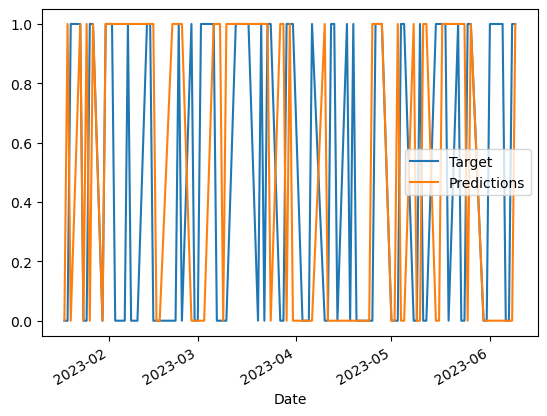

In [18]:
combined.plot()

## This is why we need more data to test on as is not as robust

# Creating a backtesting engine
### Backtesting will let us go from predicting only 100 rows to most of the data set which gives us a robust error metric and then we can use our eroor metric to be more confident

#### Backtesting involves looping over the data, splitting the data up,then training a new model every so often and using it to predict the next few rows

In [19]:
def backtest(data, model, predictors, start=1000, step=50):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        ## We are starting at row 1000 then train the model on rows 0 to 1000 then were going to make
        # predictions on rows 1000 to 1750
        
        model.fit(train[predictors], train["Target"])
        
        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
         ## This results as an array. 1st column is proability is for no and 2nd is for yes but we then
        # got rid of the 1st column so we only see the probability for yes if the price went up
        # What this allows us to do is to set a threshold. The threshold is .5 and if its greater than 
        #the threshold, it is coded as a 1

        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In [20]:
predictions = backtest(data, model, predictors)
predictions["Predictions"].value_counts()

0.0    7807
1.0     579
Name: Predictions, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5025906735751295

In [22]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [ ]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])